In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

In [2]:
def calculate_cost(X,y,theta):
    """Computes the cost function for linear regression"""
    
    h = X.dot(theta)
    errors = np.subtract(h,y)
    sqrErrors = np.square(errors)
    J = 1/(2*m) * np.sum(sqrErrors)
    return J

def gradient_descent(X_train,X_test,Y_train,Y_test,theta,alpha,iterations):
    """Computes the gradient descent for linear regression"""
    
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        h = X_train.dot(theta)
        errors = np.subtract(h,Y_train)
        sum_delta = (alpha/m) * X_train.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history_train[i] = calculate_cost(X_train,Y_train,theta)
        cost_history_test[i] = calculate_cost(X_test,Y_test,theta)
    
    return cost_history_train, cost_history_test, theta


In [45]:
# Problem 1.a
# Reading data from csv

housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","parking"]))
housing = housing.to_numpy()

# Spliting the training and validation set
np.random.seed(0) 

train, test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 42)

m = len(train) # Training samples

# Spliting the inputs and output
Y_train = train[:,0]
X_train = train[:,1:]

Y_test = test[:,0]
X_test = test[:,1:]

# Adding X0 to X_train
X0 = np.ones((len(X_train),1))
X_train = np.hstack((X0, X_train))

# Adding X0 to X_test
X0 = np.ones((len(X_test),1))
X_test = np.hstack((X0, X_test))

In [46]:
theta = np.zeros(6)
alpha = 0.0000000001
iterations = 700

cost = calculate_cost(X_train,Y_train,theta)
cost_history_train, cost_history_test, theta = gradient_descent(X_train,X_test,Y_train,Y_test,theta,alpha,iterations)

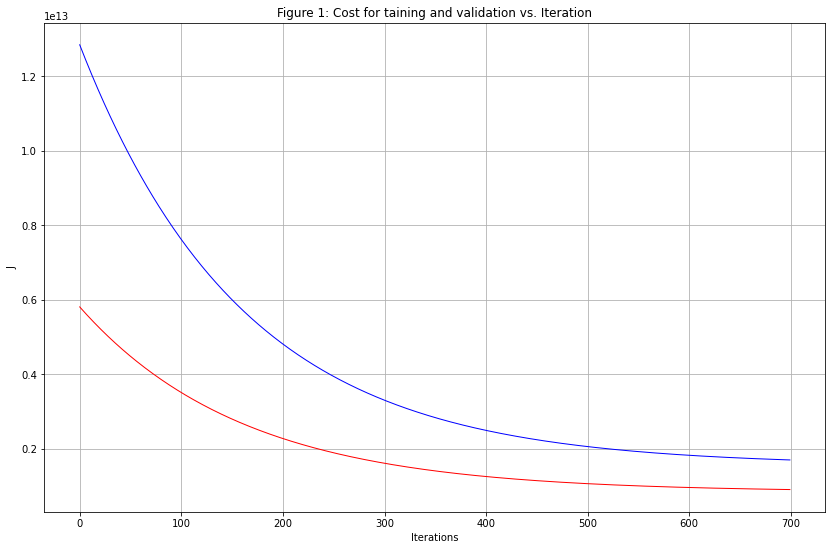

In [47]:
# Plotting the Cost vs Iterations
plt.rcParams['figure.figsize'] = [14, 9]
plt.figure()
plt.rcParams['figure.figsize'] = [11, 5]
plt.plot(cost_history_train[0:len(cost_history_train)], color='blue', linewidth=1)
plt.plot(cost_history_test[0:len(cost_history_test)], color='red', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("J")
plt.title("Figure 1: Cost for taining and validation vs. Iteration")
plt.grid()

In [53]:
# Problem 1.b
# Reading data from csv

housing = pd.DataFrame(pd.read_csv("Housing.csv"))

# Maping the yes/no inputs to 1 and 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

binarylist = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea",]
housing[binarylist] = housing[binarylist].apply(binary_map)


# Maping the furnish status to 0, 0.5, and 1
def furnish_map(x):
    return x.map({'furnished': 1, "semi-furnished": 0.5, "unfurnished": 0})

furnishinglist = ["furnishingstatus"]
housing[furnishinglist] = housing[furnishinglist].apply(furnish_map)

In [54]:
# Converting to numpy
housing = housing.to_numpy()

# Spliting the training and validation set
np.random.seed(0) 

train, test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 42)

m = len(train) # Training samples

# Spliting the inputs and output
Y_train = train[:,0]
X_train = train[:,1:]

Y_test = test[:,0]
X_test = test[:,1:]

# Adding X0 to X_train
X0 = np.ones((len(X_train),1))
X_train = np.hstack((X0, X_train))

# Adding X0 to X_test
X0 = np.ones((len(X_test),1))
X_test = np.hstack((X0, X_test))

In [55]:
theta = np.zeros(13)
alpha = 0.0000000001
iterations = 700

cost = calculate_cost(X_train,Y_train,theta)
cost_history_train, cost_history_test, theta = gradient_descent(X_train,X_test,Y_train,Y_test,theta,alpha,iterations)

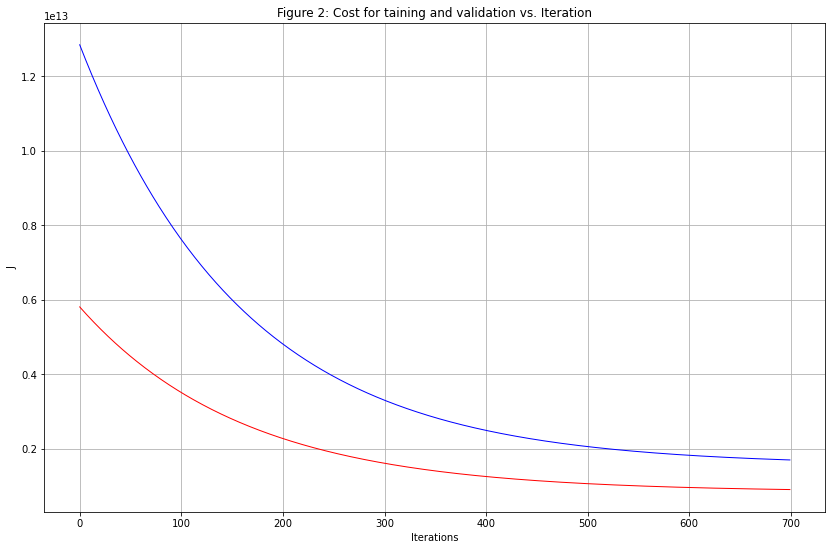

In [56]:
# Plotting the Cost vs Iterations
plt.rcParams['figure.figsize'] = [14, 9]
plt.figure()
plt.rcParams['figure.figsize'] = [11, 5]
plt.plot(cost_history_train[0:len(cost_history_train)], color='blue', linewidth=1)
plt.plot(cost_history_test[0:len(cost_history_test)], color='red', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("J")
plt.title("Figure 2: Cost for taining and validation vs. Iteration")
plt.grid()

In [10]:
# Problem 2.a
# Reading data from csv
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","parking"]))

# Spliting the training and validation set
np.random.seed(0) 

train, test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 5)

m = len(train) # Training samples


# Feature Scaling
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Standardization
scaler = StandardScaler()
std_train = scaler.fit_transform(train) 
std_test = scaler.fit_transform(test)

# Normalization
scaler = MinMaxScaler()
norm_train = scaler.fit_transform(train)
norm_test = scaler.fit_transform(test)

In [11]:
# Spliting the inputs and output for Normalization
Y_train_norm = norm_train[:,0] # Output variable for the training set
X_train_norm = norm_train[:,1:] # Input variable for the training set

Y_test_norm = norm_test[:,0] # Output variable for the validation set
X_test_norm = norm_test[:,1:] # Input variable for the training set

# Adding X0 to X_train_norm
X0 = np.ones((len(X_train_norm),1))
X_train_norm = np.hstack((X0, X_train_norm))

# Adding X0 to X_test_norm
X0 = np.ones((len(X_test_norm),1))
X_test_norm = np.hstack((X0, X_test_norm))


# Spliting the inputs and output for Standardization
Y_train_std = std_train[:,0] # Output variable for the training set
X_train_std = std_train[:,1:] # Input variable for the training set

Y_test_std = std_test[:,0] # Output variable for the validation set
X_test_std = std_test[:,1:] # Input variable for the training set

# Adding X0 to X_train_norm
X0 = np.ones((len(X_train_std),1))
X_train_std = np.hstack((X0, X_train_std))

# Adding X0 to X_test_norm
X0 = np.ones((len(X_test_std),1))
X_test_std = np.hstack((X0, X_test_std))

In [12]:
theta = np.zeros(6)
alpha = 0.01
iterations = 250

cost_history_train_norm, cost_history_test_norm, theta = gradient_descent(X_train_norm,X_test_norm,Y_train_norm,Y_test_norm,theta,alpha,iterations)

theta = np.zeros(6)
alpha = 0.01
iterations = 200
cost_history_train_std, cost_history_test_std, theta = gradient_descent(X_train_std,X_test_std,Y_train_std,Y_test_std,theta,alpha,iterations)

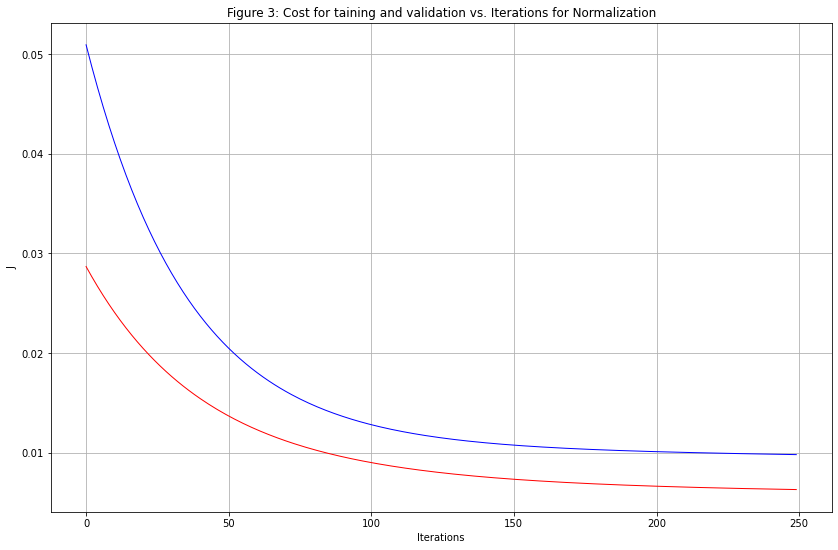

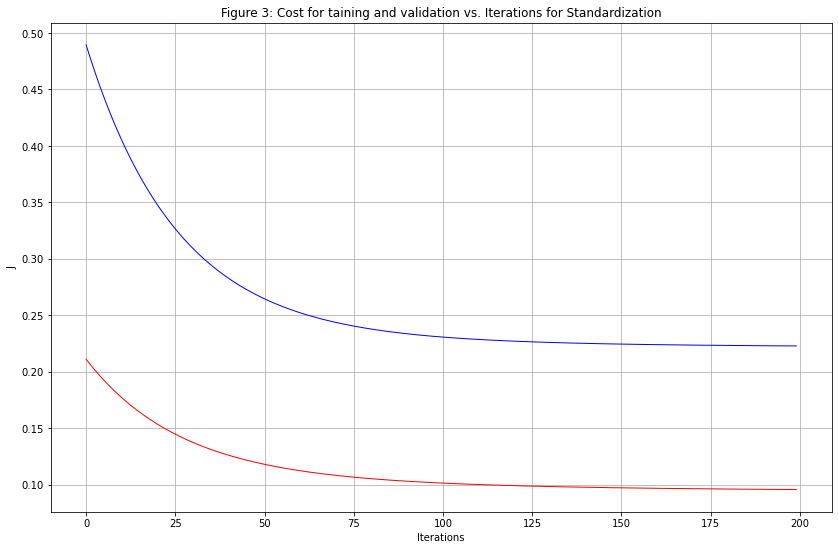

In [16]:
5# Plotting the Cost vs Iterations
plt.figure()
plt.rcParams['figure.figsize'] = [14, 9]
plt.plot(cost_history_train_norm[0:len(cost_history_train_norm)], color='blue', linewidth=1)
plt.plot(cost_history_test_norm[0:len(cost_history_test_norm)], color='red', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("J")
plt.title("Figure 3: Cost for taining and validation vs. Iterations for Normalization")
plt.grid()

plt.figure()
plt.rcParams['figure.figsize'] = [14, 9]
plt.plot(cost_history_train_std[0:len(cost_history_train_std)], color='blue', linewidth=1)
plt.plot(cost_history_test_std[0:len(cost_history_test_std)], color='red', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("J")
plt.title("Figure 3: Cost for taining and validation vs. Iterations for Standardization")
plt.grid()

In [14]:
# Problem 2.b

# Reading data from csv

housing = pd.DataFrame(pd.read_csv("Housing.csv"))

# Maping the yes/no inputs to 1 and 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

binarylist = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea",]
housing[binarylist] = housing[binarylist].apply(binary_map)


# Maping the furnish status to 0, 0.5, and 1
def furnish_map(x):
    return x.map({'furnished': 1, "semi-furnished": 0.5, "unfurnished": 0})

furnishinglist = ["furnishingstatus"]
housing[furnishinglist] = housing[furnishinglist].apply(furnish_map)

In [15]:
# Spliting the training and validation set
np.random.seed(0) 

train, test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 42)

m = len(train) # Training samples


# Feature Scaling
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Standardization
scaler = StandardScaler()
std_train = scaler.fit_transform(train) 
std_test = scaler.fit_transform(test)

# Normalization
scaler = MinMaxScaler()
norm_train = scaler.fit_transform(train)
norm_test = scaler.fit_transform(test)